<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/manual_two_layers_four_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 neural network with 3 inputs, 4 neurons in the first (hidden) layer, and 1 output neuron,

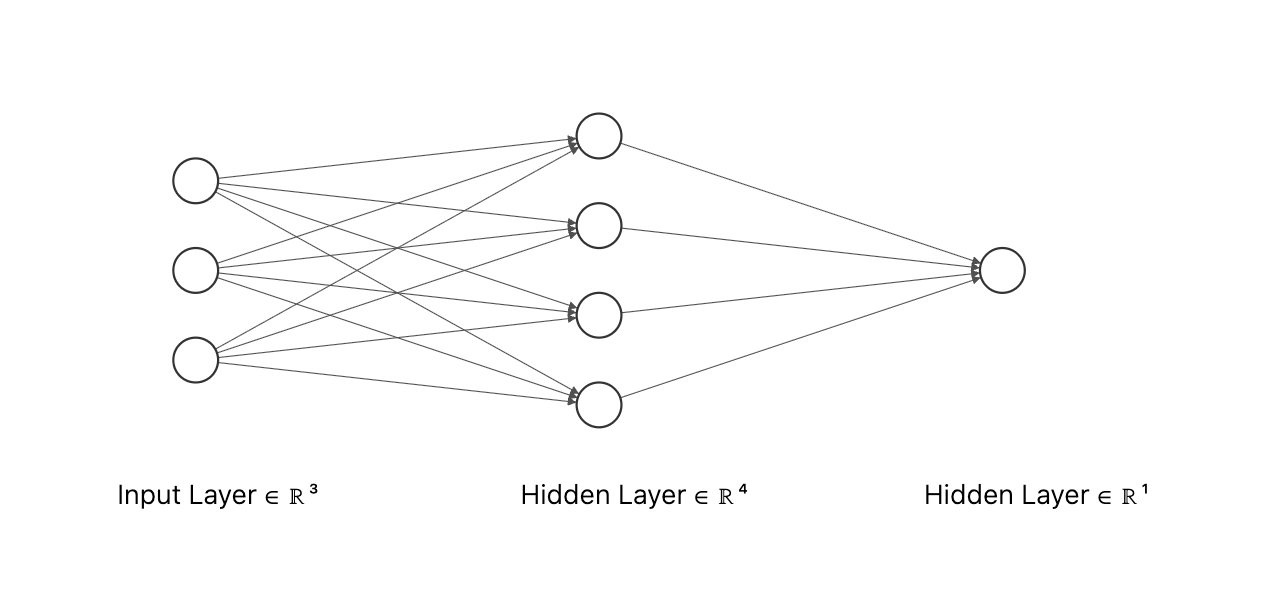

Use this data https://raw.githubusercontent.com/werowe/HypatiaAcademy/refs/heads/master/ml/log-neuron.txt


Input Layer (4) ---> [ 3 Neurons in Hidden Layer ] ---> Output Layer (1)


In [6]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Helper function: Sigmoid and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    # a = sigmoid(z)
    return a * (1 - a)

# Binary cross-entropy loss and its derivative
def loss(y_hat, y):
    eps = 1e-8  # for numerical stability
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def dloss_dyhat(y_hat, y):
    eps = 1e-8
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return - (y / y_hat) + (1 - y) / (1 - y_hat)

# Initialize weights and biases
W1 = np.random.randn(4, 3)   # (hidden: 4 neurons x 3 inputs)
b1 = np.random.randn(4)      # (hidden: 4,)
W2 = np.random.randn(1, 4)   # (output: 1 neuron x 4 hidden)
b2 = np.random.randn(1)      # (output: 1,)

# Single input (3 features) and label
x = np.array([0.5, 1.2, -0.7])
y = 1

# --- FORWARD PASS ---
# Hidden layer
z1 = W1 @ x + b1              # shape: (4,)
a1 = sigmoid(z1)              # shape: (4,)

print("output Z layer 1", z1)
print("activation a1 layer 1 ",a1)


# Output layer
z2 = W2 @ a1 + b2             # shape: (1,)
y_hat = sigmoid(z2)[0]        # scalar

print("\noutput Z layer 2 (ouput layer)", z2)
print("activation a2 layer 2 ",y_hat)

# Calculate loss
loss_value = loss(y_hat, y)

print("\nloss y={} y_hat {}".format(y,y_hat))





output Z layer 1 [-0.12897979 -1.2688535   0.31424232 -0.52109791]
activation a1 layer 1  [0.46779968 0.21945358 0.57792042 0.37259554]

output Z layer 2 (ouput layer) [0.00982568]
activation a2 layer 2  0.5024563991496861

loss y=1 y_hat 0.5024563991496861


In [ ]:
# --- BACKPROPAGATION (Manual) ---
lr = 0.01  # learning rate

# Output layer gradients
dz2 = y_hat - y                         # derivative of loss w.r.t z2, shape: (1,)
dW2 = dz2 * a1                          # (1,) * (4,) = (4,) -> broadcast to (1,4)
db2 = dz2

# Hidden layer gradients
da1 = W2.T * dz2                        # shape: (4,1) * scalar = (4,1) -> (4,)
dz1 = da1.flatten() * sigmoid_derivative(a1)   # shape: (4,)

dW1 = dz1[:, None] * x[None, :]         # (4,1) * (1,3) = (4,3)
db1 = dz1                               # (4,)

# --- Update weights and biases (Gradient Descent) ---
W2 -= lr * dW2[None, :]                 # (1,4)
b2 -= lr * db2
W1 -= lr * dW1                          # (4,3)
b1 -= lr * db1                          # (4,)

print("\nBACKPROPAGATION:")
print("dW2:", dW2)
print("db2:", db2)
print("dW1:", dW1)
print("db1:", db1)

# Math Formulas and Derivatives for a 3–4–1 Neural Network

## 1. **Network Architecture and Forward Pass**

Let:

- Input:       $\mathbf{x} \in \mathbb{R}^3$
- Hidden weights:  $W_1 \in \mathbb{R}^{4 \times 3}$, bias $b_1 \in \mathbb{R}^4$
- Output weights:  $W_2 \in \mathbb{R}^{1 \times 4}$, bias $b_2 \in \mathbb{R}$
- Activations:    all sigmoid, $\sigma(z) = \dfrac{1}{1 + e^{-z}}$

**Forward pass:**

- Hidden layer pre-activation:  
  $$
  \mathbf{z}_1 = W_1 \mathbf{x} + b_1
  $$

- Hidden layer activation:  
  $$
  \mathbf{a}_1 = \sigma(\mathbf{z}_1)
  $$

- Output pre-activation:  
  $$
  z_2 = W_2 \mathbf{a}_1 + b_2
  $$

- Network output (prediction):  
  $$
  y_{\text{hat}} = \sigma(z_2)
  $$

## 2. **Loss Function (Binary Cross-Entropy)**

If target label is $y \in \{0,1\}$ and output is $y_{\text{hat}}$:

$$
\mathcal{L}(y, y_{\text{hat}}) = -\left[ y \log(y_{\text{hat}}) + (1 - y) \log(1 - y_{\text{hat}}) \right]
$$

## 3. **Backpropagation Derivatives for a Single Example**

### **Step 1: Output Layer (from loss to $z_2$)**

- Gradient of loss with respect to output:
  $$
  \frac{\partial \mathcal{L}}{\partial y_{\text{hat}}} = -\frac{y}{y_{\text{hat}}} + \frac{1-y}{1-y_{\text{hat}}}
  $$

- Using sigmoid activation and binary cross-entropy together, the gradients simplify to:
  $$
  \frac{\partial \mathcal{L}}{\partial z_2} = y_{\text{hat}} - y
  $$

### **Step 2: Gradients for Output Weights and Bias**

- For $W_2$:
  $$
  \frac{\partial \mathcal{L}}{\partial W_2} = (y_{\text{hat}} - y) \cdot \mathbf{a}_1^T
  $$

- For $b_2$:
  $$
  \frac{\partial \mathcal{L}}{\partial b_2} = y_{\text{hat}} - y
  $$

### **Step 3: Hidden Layer (chain rule)**

- Propagate error back to $\mathbf{a}_1$:
  $$
  \delta_2 = y_{\text{hat}} - y
  $$

- Error for each hidden unit (elementwise):
  $$
  \delta_1 = \left( W_2^T \cdot \delta_2 \right) \odot \sigma'(\mathbf{z}_1)
  $$
  where
  $$
  \sigma'(\mathbf{z}_1) = \mathbf{a}_1 \odot (1 - \mathbf{a}_1)
  $$
  ($\odot$ denotes elementwise multiplication.)

- For $W_1$:
  $$
  \frac{\partial \mathcal{L}}{\partial W_1}
  = \delta_1 \cdot \mathbf{x}^T
  $$

- For $b_1$:
  $$
  \frac{\partial \mathcal{L}}{\partial b_1} = \delta_1
  $$

## **Summary Table**

| Parameter         | Gradient                                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------------------|
| $W_2$             | $(y_{\text{hat}} - y) \cdot \mathbf{a}_1^T$                                                                 |
| $b_2$             | $y_{\text{hat}} - y$                                                                                        |
| $W_1$             | $\left[ ( W_2^T \cdot (y_{\text{hat}} - y)) \odot \sigma'(\mathbf{z}_1) \right] \cdot \mathbf{x}^T$         |
| $b_1$             | $( W_2^T \cdot (y_{\text{hat}} - y)) \odot \sigma'(\mathbf{z}_1 )$                                          |

where
$$
\sigma'(\mathbf{z}_1) = \mathbf{a}_1 \odot (1 - \mathbf{a}_1)
$$
